In [114]:
import destinations
import pandas as pd

destinations_list = ["Mont Saint Michel",
                        "St Malo",
                        "Bayeux",
                        "Le Havre",
                        "Rouen",
                        "Paris",
                        "Amiens",
                        "Lille",
                        "Strasbourg",
                        "Chateau du Haut Koenigsbourg",
                        "Colmar",
                        "Eguisheim",
                        "Besancon",
                        "Dijon",
                        "Annecy",
                        "Grenoble",
                        "Lyon",
                        "Gorges du Verdon",
                        "Bormes les Mimosas",
                        "Cassis",
                        "Marseille",
                        "Aix en Provence",
                        "Avignon",
                        "Uzes",
                        "Nimes",
                        "Aigues Mortes",
                        "Saintes Maries de la mer",
                        "Collioure",
                        "Carcassonne",
                        "Ariege",
                        "Toulouse",
                        "Montauban",
                        "Biarritz",
                        "Bayonne",
                        "La Rochelle"]

#destinations_list = destinations.destinationsList




In [115]:
print(destinations_list)

['Mont Saint Michel', 'St Malo', 'Bayeux', 'Le Havre', 'Rouen', 'Paris', 'Amiens', 'Lille', 'Strasbourg', 'Chateau du Haut Koenigsbourg', 'Colmar', 'Eguisheim', 'Besancon', 'Dijon', 'Annecy', 'Grenoble', 'Lyon', 'Gorges du Verdon', 'Bormes les Mimosas', 'Cassis', 'Marseille', 'Aix en Provence', 'Avignon', 'Uzes', 'Nimes', 'Aigues Mortes', 'Saintes Maries de la mer', 'Collioure', 'Carcassonne', 'Ariege', 'Toulouse', 'Montauban', 'Biarritz', 'Bayonne', 'La Rochelle']


In [116]:
df = pd.DataFrame (destinations_list, columns = ['cities'])
print (df)

                          cities
0              Mont Saint Michel
1                        St Malo
2                         Bayeux
3                       Le Havre
4                          Rouen
5                          Paris
6                         Amiens
7                          Lille
8                     Strasbourg
9   Chateau du Haut Koenigsbourg
10                        Colmar
11                     Eguisheim
12                      Besancon
13                         Dijon
14                        Annecy
15                      Grenoble
16                          Lyon
17              Gorges du Verdon
18            Bormes les Mimosas
19                        Cassis
20                     Marseille
21               Aix en Provence
22                       Avignon
23                          Uzes
24                         Nimes
25                 Aigues Mortes
26      Saintes Maries de la mer
27                     Collioure
28                   Carcassonne
29        

In [117]:
# importing geopy library
#!pip install geopy
from lib2to3.pgen2.pgen import DFAState
from geopy.geocoders import Nominatim
#import geopy

# getting length of list
length = len(df)

# calling the Nominatim tool
loc = Nominatim(user_agent="GetLoc")

df = df.assign(latitude='0')
df = df.assign(longitude='0')

for i in df.index:
    getLoc = loc.geocode(df['cities'][i])
    df['latitude'][i] = getLoc.latitude
    df['longitude'][i] = getLoc.longitude

df

,cities,latitude,longitude
0,Mont Saint Michel,48.635954,-1.51146
1,St Malo,48.649518,-2.026041
2,Bayeux,49.276462,-0.702474
3,Le Havre,49.493898,0.107973
4,Rouen,49.440459,1.093966
5,Paris,48.85889,2.320041
6,Amiens,49.894171,2.295695
7,Lille,50.636565,3.063528
8,Strasbourg,48.584614,7.750713
9,Chateau du Haut Koenigsbourg,48.24949,7.344296


In [118]:
weather_api_key = '3ee996f64e301bac44b70a171911b57f'

import urllib.request, json 

weather = pd.DataFrame(columns=['city','lat','lon','time','temp'])

for i in df.index:
    lat = str(df['latitude'][i])
    lon = str(df['longitude'][i])
    city = df['cities'][i]
    with urllib.request.urlopen("https://api.openweathermap.org/data/2.5/forecast?lat="+lat+"&lon="+lon+"&appid="+weather_api_key+"&units=metric&lang=fr") as url:
        data = json.load(url)
        for content in data['list']:
            #print(type(content))
            #print(content)
            #meteo = {'city': city, 'time': content['dt_txt'], 'temp': content['main']['temp'], 'weather': content['weather']['main']}
            meteo = {'city': city, 'lat' : lat, 'lon' : lon, 'time': content['dt_txt'], 'temp' : content['main']['temp']}
            weather = weather.append(meteo, ignore_index=True)
            #print(meteo)
            #print(content['dt_txt'])
            #for line in content:
                #meteo = {'city': city, 'time': line['dt_txt'], 'temp': line['main']['temp'], 'weather': line['weather']['main']}
                #print(line)
    
    #for i in data:
    #    print(type(i))

    
print(weather)
#json_data = [] # your list with json objects (dicts)





C:\Users\frede\AppData\Local\Temp\ipykernel_26632\437306318.py:18: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\frede\AppData\Local\Temp\ipykernel_26632\437306318.py:18: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\frede\AppData\Local\Temp\ipykernel_26632\437306318.py:18: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\frede\AppData\Local\Temp\ipykernel_26632\437306318.py:18: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\frede\AppData\Local\Temp\ipykernel_26632\437306318.py:18: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

                   city         lat                 lon                 time  \
0     Mont Saint Michel  48.6359541  -1.511459954959514  2022-10-24 15:00:00   
1     Mont Saint Michel  48.6359541  -1.511459954959514  2022-10-24 18:00:00   
2     Mont Saint Michel  48.6359541  -1.511459954959514  2022-10-24 21:00:00   
3     Mont Saint Michel  48.6359541  -1.511459954959514  2022-10-25 00:00:00   
4     Mont Saint Michel  48.6359541  -1.511459954959514  2022-10-25 03:00:00   
...                 ...         ...                 ...                  ...   
1395        La Rochelle  46.1591126          -1.1520434  2022-10-29 00:00:00   
1396        La Rochelle  46.1591126          -1.1520434  2022-10-29 03:00:00   
1397        La Rochelle  46.1591126          -1.1520434  2022-10-29 06:00:00   
1398        La Rochelle  46.1591126          -1.1520434  2022-10-29 09:00:00   
1399        La Rochelle  46.1591126          -1.1520434  2022-10-29 12:00:00   

       temp  
0     16.91  
1      15.3

C:\Users\frede\AppData\Local\Temp\ipykernel_26632\437306318.py:18: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\frede\AppData\Local\Temp\ipykernel_26632\437306318.py:18: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\frede\AppData\Local\Temp\ipykernel_26632\437306318.py:18: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\frede\AppData\Local\Temp\ipykernel_26632\437306318.py:18: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\frede\AppData\Local\Temp\ipykernel_26632\437306318.py:18: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

In [119]:
#Creation of a dataframe with the average temperature for the next coming days

df_mean = weather.groupby(['city','lat','lon'])[['temp']].mean()
df_mean = df_mean.sort_values(by=['temp'],ascending=False)
df_mean = df_mean.reset_index()

df_mean['lat'] = df_mean['lat'].astype(float)
df_mean['lon'] = df_mean['lon'].astype(float)
df_mean['temp'] = round(df_mean['temp'].astype(float),2)

df_mean.to_csv('weather.csv',index=False)
#df.to_csv(index=False)

In [120]:
df_mean

,city,lat,lon,temp
0,Marseille,43.296174,5.369953,21.52
1,Cassis,43.214036,5.539632,21.45
2,Bayonne,43.494514,-1.473666,20.66
3,Aix en Provence,43.529842,5.447474,20.63
4,Biarritz,43.471144,-1.552727,20.20
5,Collioure,42.525050,3.083155,20.19
6,Montauban,44.017584,1.354999,20.17
7,Toulouse,43.604462,1.444247,20.13
8,Saintes Maries de la mer,43.452277,4.428717,20.07
9,Bormes les Mimosas,43.150697,6.341928,19.72


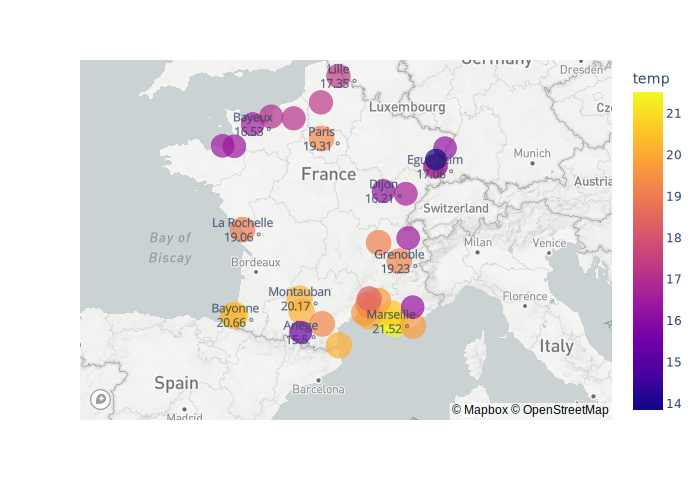

In [121]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import plotly.io as pio
import kaleido

#df_mean = df_mean[:5]

# df_mean['text'] = df['city'] + '<br>Temperature ' + (df_mean['temp']).astype(str)+' °'
df_mean['text'] = df_mean['city'] + '<br>' + (df_mean['temp']).astype(str)+' °'

px.set_mapbox_access_token(open(".mapbox_token").read())
#df_car = px.data.carshare()
#df_car
mapbox = px.scatter_mapbox(df_mean, lat="lat", lon="lon", color="temp", size="temp", text="text" , hover_name="city", zoom=4)
#df_car
mapbox.show()

C:\Users\frede\AppData\Local\Temp\ipykernel_26632\2165087304.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



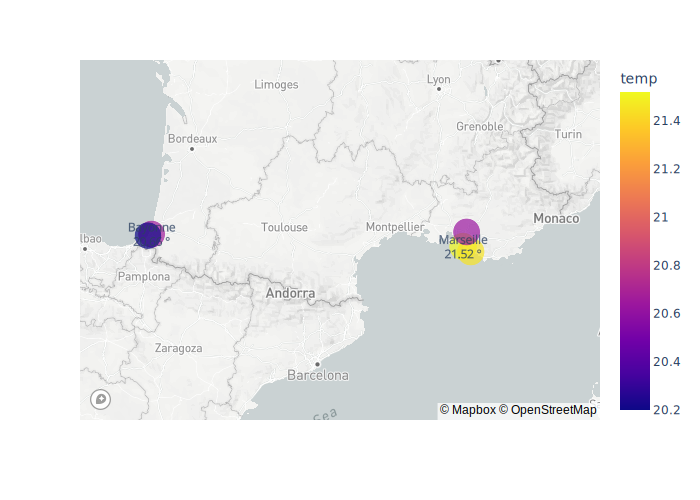

In [122]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import plotly.io as pio
import kaleido

df_mean = df_mean[:5]

# df_mean['text'] = df['city'] + '<br>Temperature ' + (df_mean['temp']).astype(str)+' °'
df_mean['text'] = df_mean['city'] + '<br>' + (df_mean['temp']).astype(str)+' °'

px.set_mapbox_access_token(open(".mapbox_token").read())
#df_car = px.data.carshare()
#df_car
mapbox = px.scatter_mapbox(df_mean, lat="lat", lon="lon", color="temp", size="temp", text="text" , hover_name="city", zoom=5)
#df_car
mapbox.show()


[notice] A new release of pip available: 22.1.2 -> 22.3
[notice] To update, run: C:\Users\frede\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


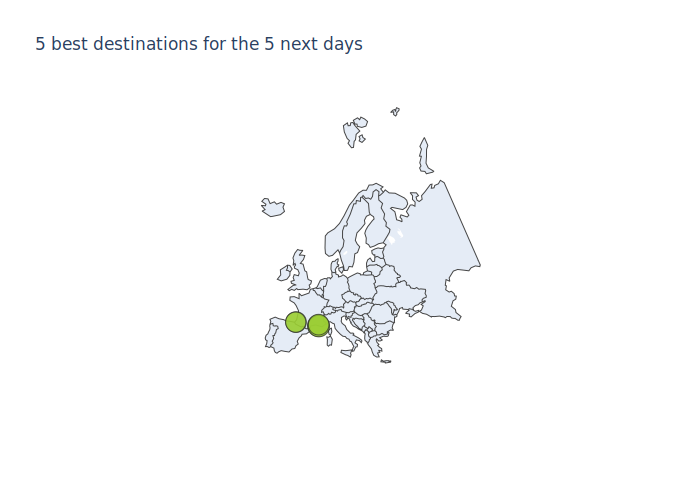

In [123]:
import plotly.graph_objects as go
import pandas as pd
import plotly.io as pio

pio.renderers.default = "svg"
!pip install kaleido

df_mean = df_mean[:5]

# df_mean['text'] = df['city'] + '<br>Temperature ' + (df_mean['temp']).astype(str)+' °'
df_mean['text'] = df_mean['city'] + '<br>Temperature ' + (df_mean['temp']).astype(str)+' °'
# limits = [(0,9),(10,14),(15,19),(20,24),(25,35)]
# colors = ["royalblue","crimson","lightseagreen","orange","lightgrey"]
# cities = []
# scale = 40

fig = go.Figure(data=go.Scattergeo(
    #locationmode = 'country names',
    #locations = ["France"],
    lon = df_mean['lon'],
    lat = df_mean['lat'],
    text = df_mean['text'],
    mode = 'markers',
    marker = dict(size = df_mean['temp'],line_color='rgb(40,40,40)'),
    marker_color = "yellowgreen"
    #sizemode = 'diameter'
))

fig.update_layout(
    title = '5 best destinations for the 5 next days',
    geo_scope = 'europe',
    #size="pop"
)

fig.show()

In [124]:
hotel1 = df_mean[:1]
hotel1['city'] = hotel1['city'].astype(str)
hotel1 = hotel1.reset_index(drop=True)
hotel1_city = hotel1['city'].to_string(index=False)

hotels = pd.read_json('./json/booking_hotels.json')
#hotels = hotels[hotels['hotel_city'] == hotel1_city]
#hotels
hotels = hotels[hotels["hotel_city"].str.contains(hotel1_city)]
#hotels[hotels["hotel_city"].str.contains(hotel1_city)]
#hotels
hotels

C:\Users\frede\AppData\Local\Temp\ipykernel_26632\2775433700.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,hotel_city,hotel_url,hotel_name,hotel_description,hotel_score,hotel_coord
0,Marseille,https://www.booking.com/hotel/fr/charmant-stud...,Charmant studio avec balcon Marseille centre,"[Situé à Marseille, à 2,7 km de la station de ...",10,"43.30981200,5.39887990"
1,Marseille,https://www.booking.com/hotel/fr/btdm-hostel.f...,BTDM Hostel,"[Doté d'un bar, d'un salon commun et offrant u...","9,4","43.29651900,5.37213900"
2,Marseille,https://www.booking.com/hotel/fr/les-jardins-d...,Les jardins du Paradis,[Vous pouvez bénéficier d'une réduction Genius...,"9,2","43.27631450,5.38426240"
3,Marseille,https://www.booking.com/hotel/fr/le-beluga-air...,*Le Beluga* Air conditioning/Jacuzzi/Garden/Park,"[Bénéficiant d'une vue sur le jardin, *Situé à...","9,5","43.30372560,5.43006660"
4,Marseille,https://www.booking.com/hotel/fr/spacieux-et-l...,Spacieux et lumineux appartement vue mer Joliette,"[Situé dans le centre de Marseille, à moins de...","9,5","43.30222890,5.36481140"
5,Marseille,https://www.booking.com/hotel/fr/chambres-dans...,Chambres dans appartement à 2min de la canebiè...,[L'établissement Chambres dans appartement à 2...,10,"43.29485580,5.38109320"
6,Marseille,https://www.booking.com/hotel/fr/suite-privee-...,Suite privée du balcon du vieux port Marseille,[Vous pouvez bénéficier d'une réduction Genius...,"9,7","43.29183700,5.36777450"
7,Marseille,https://www.booking.com/hotel/fr/la-farigoulet...,La Farigoulette suites,[Vous pouvez bénéficier d'une réduction Genius...,"9,8","43.29826788,5.52026457"
8,Marseille,https://www.booking.com/hotel/fr/centre-ville-...,Centre ville,[Vous pouvez bénéficier d'une réduction Genius...,"9,0","43.28819640,5.38274300"
9,Marseille,https://www.booking.com/hotel/fr/atypique-1827...,Atypique 1827,[Vous pouvez bénéficier d'une réduction Genius...,"9,0","43.29355684,5.39213377"


In [134]:
#hotel1_city = hotel1['city'].to_string(index=False)
#hotels.assign(lat=lambda x: x.hotel_coord.split(',',1)[0])
#hotels['lat'] = df.apply(lambda row: row.Cost, axis = 1)
hotels['hotel_coord'] = hotels['hotel_coord'].astype('string')
hotels[['lat','lon']] = hotels.hotel_coord.str.split(",",expand=True,)

hotels['lat'] = hotels['lat'].astype(float)
hotels['lon'] = hotels['lon'].astype(float)
hotels['hotel_score'] = hotels['hotel_score'].replace(',','.')
hotels['hotel_score'] = hotels['hotel_score'].astype(float)

#hotels.assign(lat=lambda x: x['hotel_coord'].str.split(",")[0])
#hotels['lat'] = hotels['hotel_coord'].str.split(',')
hotels.info()
hotels

ValueError: could not convert string to float: '9,4'

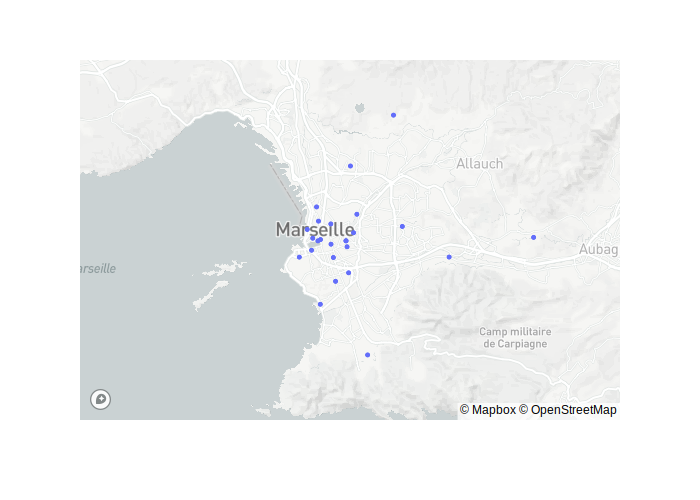

In [131]:
px.set_mapbox_access_token(open(".mapbox_token").read())
#df_car = px.data.carshare()
#df_car
mapbox = px.scatter_mapbox(hotels, lat="lat", lon="lon", color="hotel_score", size="hotel_score", zoom=11)
#df_car
mapbox.show()